# Program 11 Autoencoder on MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.layers import *

2024-10-20 23:08:37.383380: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-20 23:08:37.693427: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 23:08:37.804641: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 23:08:37.838618: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 23:08:38.061631: I tensorflow/core/platform/cpu_feature_guar

In [2]:

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()


In [3]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:

# x_train = x_train.astype('float32') / 255.0
# x_test = x_test.astype('float32') / 255.0

# Flatten the images
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Build the Autoencoder model
input_img = Input(shape=(28,28))
x=tf.keras.layers.Rescaling(1./255)(input_img)
x=tf.keras.layers.Flatten()(x)# 28x28 = 784
#! Encoder
encoded = Dense(64, activation='relu')(x) 
#! Decoder
decoded = Dense(784, activation='sigmoid')(encoded) 
decoded = Reshape((28,28))(decoded) 

autoencoder = Model(input_img, decoded)

I0000 00:00:1729445924.080563  108283 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729445924.329380  108283 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729445924.329438  108283 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729445924.337393  108283 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729445924.337763  108283 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [5]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


In [6]:

# Train the Autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/50


I0000 00:00:1729445927.124150  108457 service.cc:146] XLA service 0x7f51fc008440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729445927.124239  108457 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-10-20 23:08:47.178501: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-20 23:08:47.306046: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-20 23:08:48.448277: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_122', 68 bytes spill stores, 68 bytes spill loads

2024-10-20 23:08:48.495833: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory

 72/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0418 - loss: -107.0621

I0000 00:00:1729445931.016222  108457 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


224/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0292 - loss: -297.9222

2024-10-20 23:08:52.441184: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_122', 48 bytes spill stores, 48 bytes spill loads

2024-10-20 23:08:52.539667: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_122', 148 bytes spill stores, 148 bytes spill loads

2024-10-20 23:08:53.221031: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_122', 12 bytes spill stores, 12 bytes spill loads



235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0286 - loss: -304.7027

2024-10-20 23:08:56.227077: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_54', 16 bytes spill stores, 16 bytes spill loads



235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.0285 - loss: -305.2935 - val_accuracy: 0.0060 - val_loss: -527.6030
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0055 - loss: -520.2565 - val_accuracy: 0.0046 - val_loss: -527.9436
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0049 - loss: -520.3172 - val_accuracy: 0.0048 - val_loss: -528.7389
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0047 - loss: -520.4796 - val_accuracy: 0.0043 - val_loss: -529.3229
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0045 - loss: -522.6299 - val_accuracy: 0.0048 - val_loss: -529.6566
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0048 - loss: -522.6221 - val_accuracy: 0.0048 - val_loss: -529.9497
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0049 - loss: -522.3201 - val_accuracy: 0.0048 - val_loss: -530.1987
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0051 

In [7]:

# Encode and decode some digits
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)


2024-10-20 23:10:46.972107: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15', 48 bytes spill stores, 48 bytes spill loads

2024-10-20 23:10:47.066200: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15', 148 bytes spill stores, 148 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


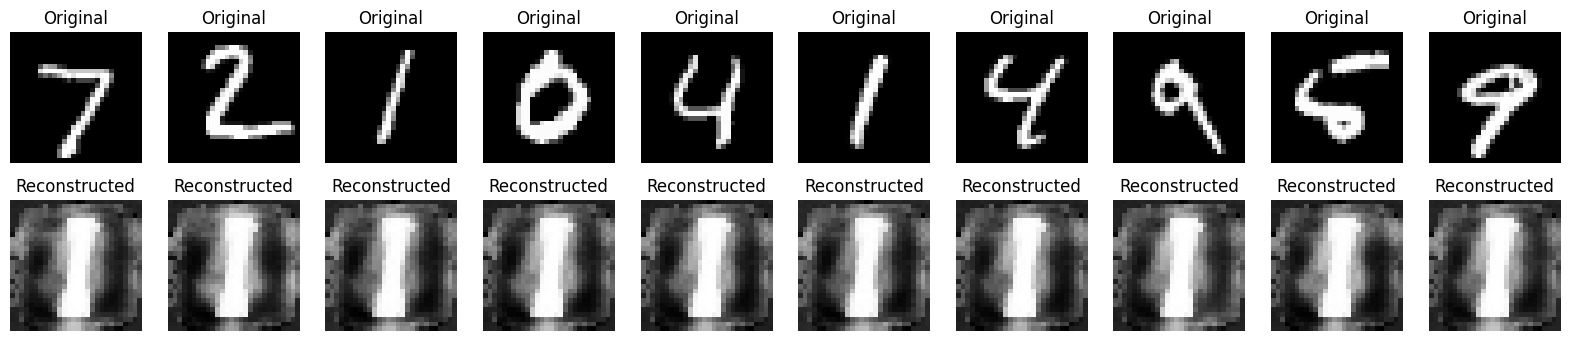

In [8]:

# ! Visualize the results
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    #! Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    #! Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to include a channel dimension (needed for Conv2D)
x_train = np.reshape(x_train, (len(x_train), 28, 28,1))
x_test = np.reshape(x_test, (len(x_test), 28, 28,1))

# Build the complex Autoencoder model
input_img = Input(shape=(28, 28,1))  # Input shape (28x28x1)

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)  # First conv layer
x = MaxPooling2D((2, 2), padding='same')(x)  # First pooling layer
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # Second conv layer
x = MaxPooling2D((2, 2), padding='same')(x)  # Second pooling layer
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)  # Third conv layer
encoded = MaxPooling2D((2, 2), padding='same')(x)  # Encoded representation (compressed)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)  # First up-sampling
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # Second up-sampling
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)  # Third up-sampling
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # Final reconstruction layer

# Create the model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the Autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some digits
decoded_imgs = autoencoder.predict(x_test)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


2024-10-20 23:19:55.561090: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-20 23:19:55.865971: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 23:19:55.974989: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 23:19:56.005470: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 23:19:56.182535: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/50


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 28, 28, 1), output.shape=(None, 32, 32, 1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Preprocess the data (normalize and add a channel dimension)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to include the channel dimension (for Conv2D)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Build the complex Autoencoder model
input_img = Input(shape=(28, 28, 1))  # Input shape (28x28x1)

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)  # First conv layer
x = MaxPooling2D((2, 2), padding='same')(x)  # First pooling layer (output: 14x14x32)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # Second conv layer
x = MaxPooling2D((2, 2), padding='same')(x)  # Second pooling layer (output: 7x7x64)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)  # Third conv layer
encoded = MaxPooling2D((2, 2), padding='same')(x)  # Encoded representation (output: 4x4x128)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)  # First up-sampling
x = UpSampling2D((2, 2))(x)  # Output: 8x8x128
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # Second up-sampling
x = UpSampling2D((2, 2))(x)  # Output: 16x16x64
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)  # Third up-sampling
x = UpSampling2D((2, 2))(x)  # Output: 32x32x32 (will be cropped back to 28x28)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='valid')(x)  # Final reconstruction layer (Output: 28x28x1)

# Create the model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the Autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some digits
decoded_imgs = autoencoder.predict(x_test)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


Epoch 1/50


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 28, 28, 1), output.shape=(None, 30, 30, 1)

Epoch 1/50


I0000 00:00:1729446884.017411  115152 service.cc:146] XLA service 0x7efa540099d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729446884.018440  115152 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-10-20 23:24:44.216808: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-20 23:24:44.968959: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 15/235 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.5498

I0000 00:00:1729446890.165387  115152 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.2526 - val_loss: 0.1054
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1008 - val_loss: 0.0906
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0883 - val_loss: 0.0822
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0827 - val_loss: 0.0792
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0795 - val_loss: 0.0764
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0771 - val_loss: 0.0752
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0754 - val_loss: 0.0739
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0745 - val_loss: 0.0732
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0737 - val_loss: 0.0723
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0729 - val_loss: 0.0718
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0723 - val_loss: 0.0711
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/st

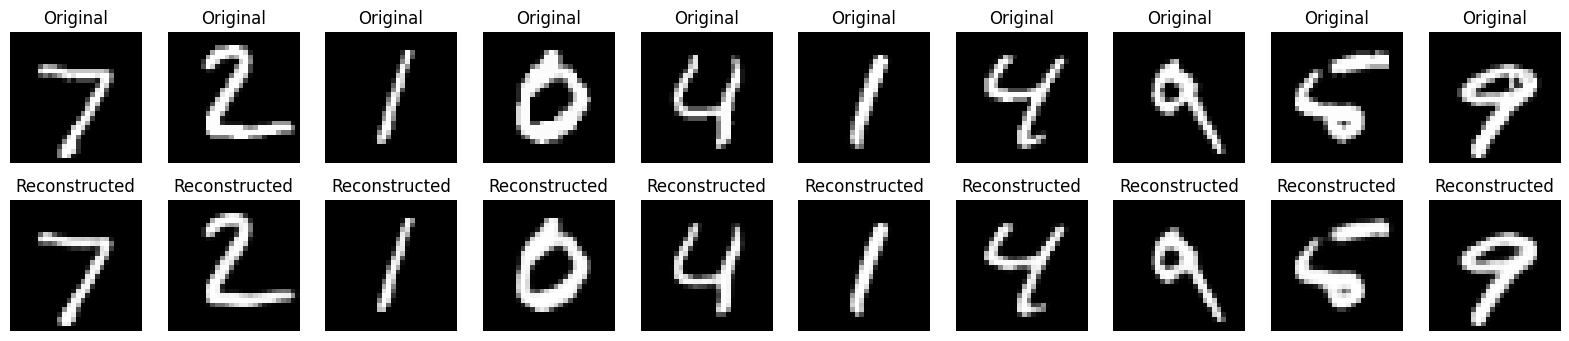

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Preprocess the data (normalize and add a channel dimension)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to include the channel dimension (for Conv2D)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Build the complex Autoencoder model
input_img = Input(shape=(28, 28, 1))  # Input shape (28x28x1)

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)  # First conv layer
x = MaxPooling2D((2, 2), padding='same')(x)  # First pooling layer (output: 14x14x32)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # Second conv layer
x = MaxPooling2D((2, 2), padding='same')(x)  # Second pooling layer (output: 7x7x64)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)  # Third conv layer
encoded = MaxPooling2D((2, 2), padding='same')(x)  # Encoded representation (output: 4x4x128)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)  # First up-sampling
x = UpSampling2D((2, 2))(x)  # Output: 8x8x128
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # Second up-sampling
x = UpSampling2D((2, 2))(x)  # Output: 16x16x64
x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)  # Third up-sampling
x = UpSampling2D((2, 2))(x)  # Output: 32x32x32
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # Final reconstruction layer (output: 28x28x1)

# Create the model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the Autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some digits
decoded_imgs = autoencoder.predict(x_test)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


In [8]:
autoencoder.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_12 (UpSampling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 8, 8, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_13 (UpSampling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_14 (UpSampling2D) │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 998,405 (3.81 MB)

 Trainable params: 332,801 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 665,604 (2.54 MB)

In [9]:
autoencoder.save('autoencoder.keras')